<a href="https://colab.research.google.com/github/TasfiaTahsinAnnita/CSE475Labtasks/blob/main/Labtask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/CSE475/MangoLeafBD Dataset'

dataset is the variable where we have stored the path of our MangoLeafBD dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import glob
from sklearn.tree import plot_tree
from sklearn import tree

We have imported the necessary libraries here

In [ ]:
image_size = (240, 320)
mangotypes = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
               'Gall Midge', 'Powdery Mildew', 'Sooty Mould', 'Healthy']

image_size=(240,300) specifies the dimensions of our images in order to resize each image to 240x300 pixels.
Then in mangotypes we have provided the names of specific classes of our dataset. These variables define the image processinf requirements and the categories for our classification of the data.

In [ ]:
def load_images(dataset, mangotypes):
    data = []
    labels = []
    for class_idx, class_name in enumerate(mangotypes):
        image_paths = glob.glob(f"{dataset}/{class_name}/*.jpg")
        for img_path in image_paths:
            image = Image.open(img_path).resize(image_size)
            image_array = np.array(image).flatten()
            data.append(image_array)
            labels.append(class_idx)
    return np.array(data), np.array(labels)

The load_images fuction processes the images and resizes each of them to image_size and converts them into flattened arrays and stores them into data. The corresponding class indices are stored in labels.


In [ ]:
data, labels = load_images(dataset, mangotypes)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (4000, 230400)
Labels shape: (4000,)


Here we have loaded the images and printed the shapes of the resulting data and label arrays.


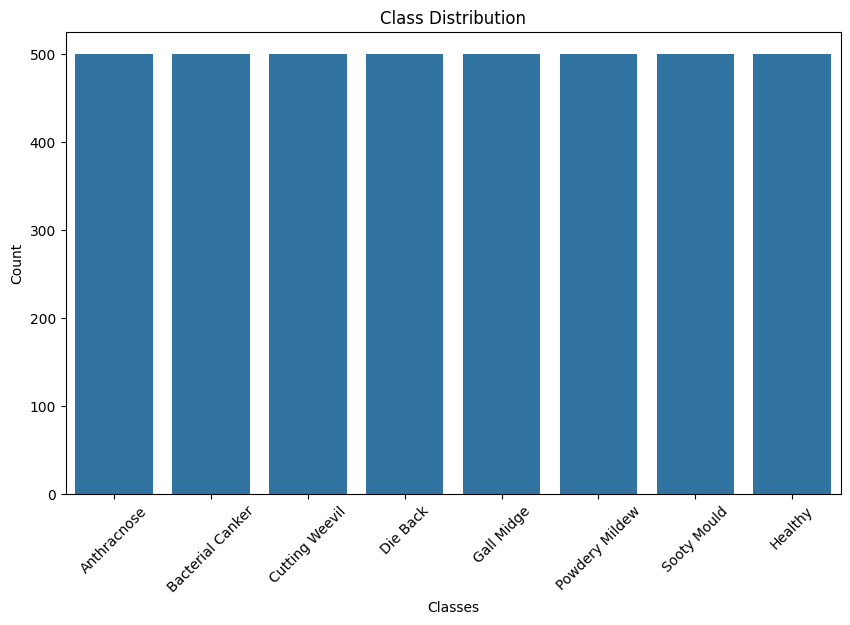

In [ ]:
class_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(ticks=range(len(mangotypes)), labels=mangotypes, rotation=45)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

This bar plot shows our dataset's distribution according to their different classes. Each bar gives a class from mangotypes and the height of bar shows the number of images present in the class. The visualization indicates a balanced dataset with each class having an equal number of approximately 500 images.

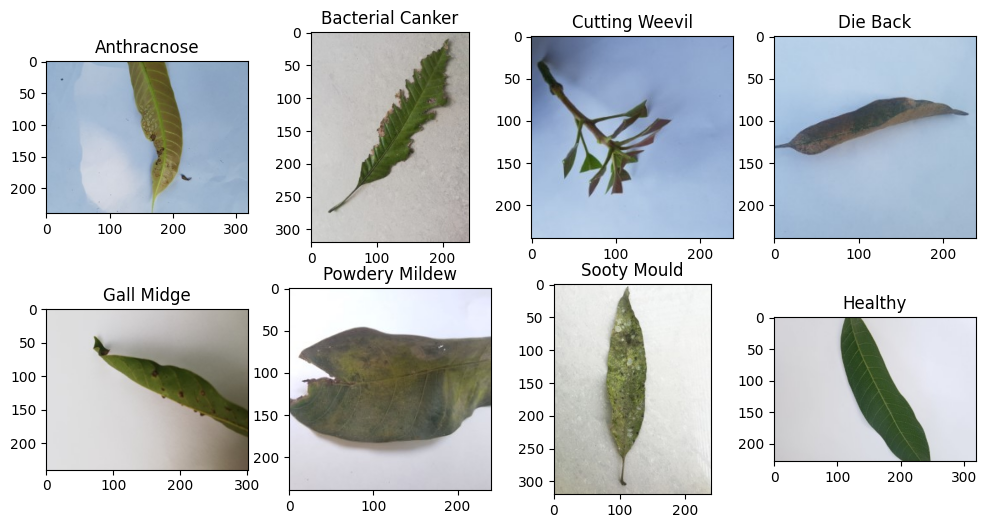

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, class_name in enumerate(mangotypes):
    img_path = glob.glob(f"{dataset}/{class_name}/*.jpg")[0]
    img = Image.open(img_path)
    axs[i//4, i%4].imshow(img)
    axs[i//4, i%4].set_title(class_name)
plt.show()

This figure shows a grid sample images from each and every class in our mangoleafbd dataset. Each subplot represents one of the classes and displays an example image from the class. This visualization provides an overview of the different types of mango leaf conditions in the dataset


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (3200, 230400), Test set size: (800, 230400)


Here we have splitted our dataset into two parts. Training dataset and test dataset where training is the 80% of the data and test is the 20% of the data.

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

Here we have trained our decision tree model

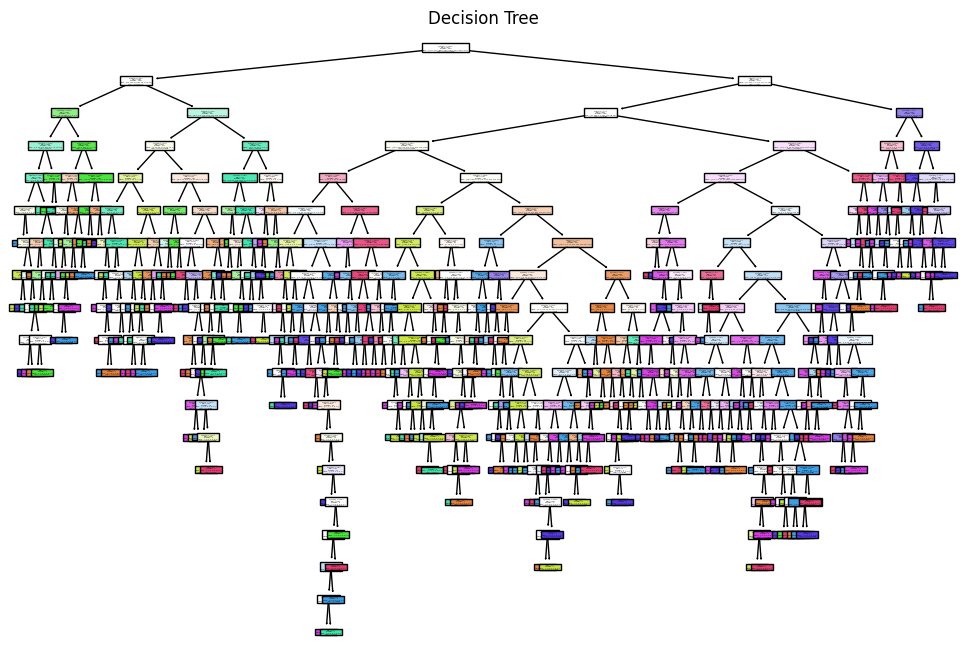

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt, class_names=mangotypes, filled=True)
plt.title('Decision Tree')
plt.show()

This diagram visualizes the structure of a trained decision tree classifier. Each node represents a decision based on a feature, splitting the data into branches. The leaves at the bottom indicated the final claasification outcomes. The different colors represents the various classes in the dataset. This tree helps illustrate how decisions are made to classify mango leaf conditions.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

Here we have trained our random forest classifier model


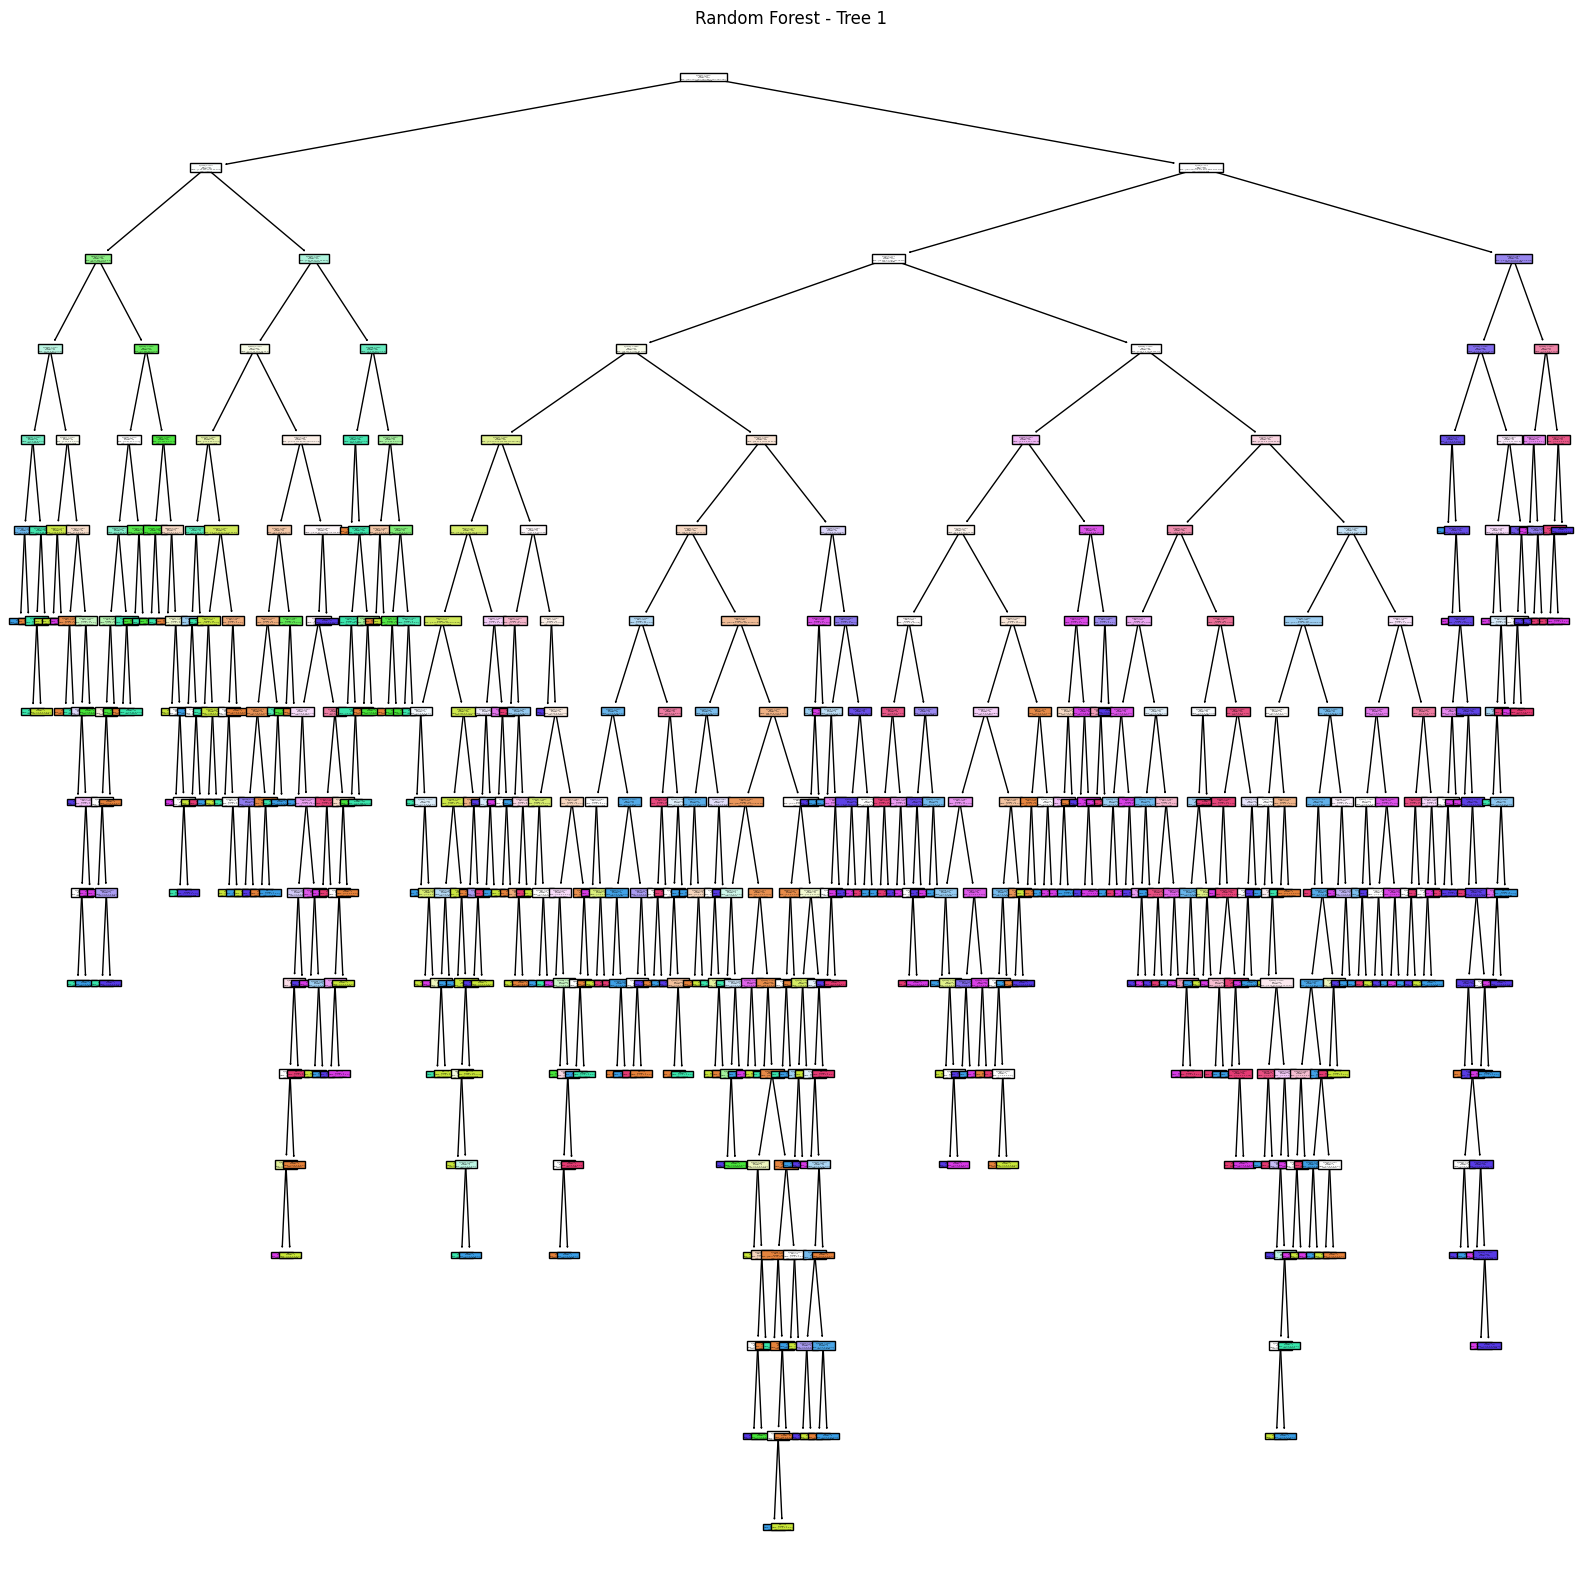

In [ ]:
plt.figure(figsize=(20, 20))
_ = plot_tree(rf.estimators_[0], filled=True, class_names=mangotypes)
plt.title('Random Forest - Tree 1')
plt.show()

This diagram shows a random forest tree which is a collection of decision trees working together of improve predictive accuracy. Each note reoresents a decision based on a feature, and the branches show possible outcomes leading to further splits or leaf nodes, which represents final classifications. The colors indicare how the model navigates through features to make predictions. This tree is just one in the ensemble, contributing to the final decision through a majority vote acrooss all trees in the forest.

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nDecision Tree Classification Report")
print(classification_report(y_test, dt_pred, target_names=mangotypes))
print("\nRandom Forest Classification Report")
print(classification_report(y_test, rf_pred, target_names=mangotypes))


Decision Tree Accuracy: 0.67875
Random Forest Accuracy: 0.87125

Decision Tree Classification Report
                  precision    recall  f1-score   support

     Anthracnose       0.74      0.67      0.71       123
Bacterial Canker       0.61      0.76      0.67        86
  Cutting Weevil       0.88      0.96      0.92       112
        Die Back       0.84      0.76      0.80       101
      Gall Midge       0.52      0.47      0.49       104
  Powdery Mildew       0.59      0.58      0.58        90
     Sooty Mould       0.53      0.53      0.53        91
         Healthy       0.66      0.66      0.66        93

        accuracy                           0.68       800
       macro avg       0.67      0.67      0.67       800
    weighted avg       0.68      0.68      0.68       800


Random Forest Classification Report
                  precision    recall  f1-score   support

     Anthracnose       0.85      0.83      0.84       123
Bacterial Canker       0.83      0.93      0.8

The random forest model significantly outperforms the single decision tree in all the perfomace measures such as accuracy, precision, recall and f1-score across all classes. Random forest achieved higher scores as ir aggregates multiple decision trees, reducing overfitting and improving generalization. Particularly in classes like "Bacterial Canker" and "Powdery Mildew", random forest demonstrates greater recall and f1-scores, indicating more reliable predictions. This ensemble approach captures patterns more robustly than a single decision tree, which tends to overfit to specific features, resulting in lower performance.

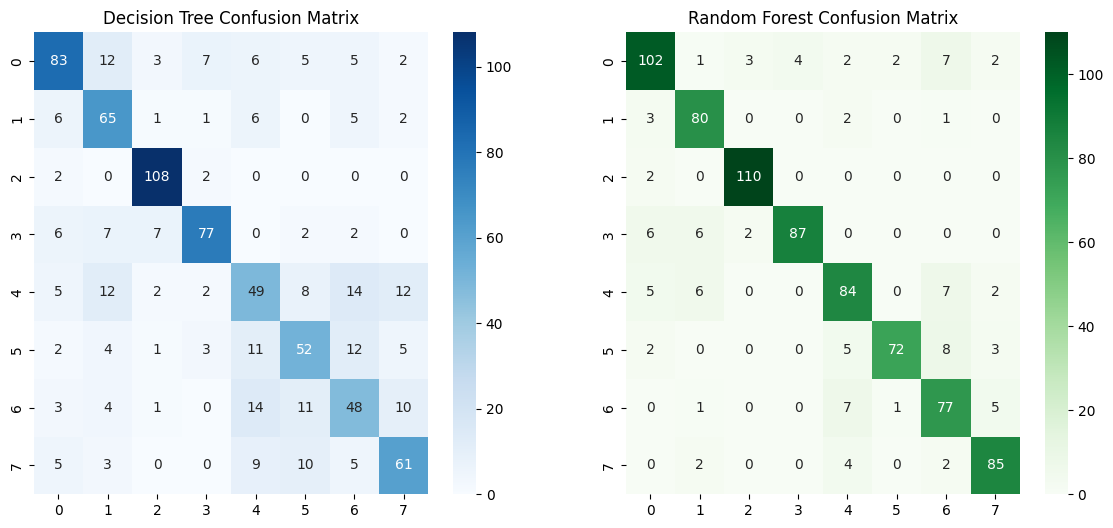

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt="d", ax=ax[0], cmap="Blues")
ax[0].set_title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", ax=ax[1], cmap="Greens")
ax[1].set_title("Random Forest Confusion Matrix")
plt.show()

The confusion matrices show the performance of the decision tree and random forest models in predicting different classes. The random forest has fewer misclassifications compared to decision tree, with stronger diagonal values indicating higher correct classifications across categories. The random forest matrix is more concentrated on the diagonal, reflecting better accuracy and reduced errors, while the decision tree matrix has more off-diagonal values, indicating a higher rate of misclassifications. This supports the higher overall accuracy and reliability of the random forest model.

[https://github.com/TasfiaTahsinAnnita/CSE475Labtasks/blob/main/Labtask1.ipynb](https://github.com/TasfiaTahsinAnnita/CSE475Labtasks/blob/main/Labtask1.ipynb)